In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading dataset
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
## Checking null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
## By perccentage
(df.isnull().sum()/len(df))*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [7]:
## There is only 1% null values we can simply drop them or impute them as per your choice.(I'm imputing the null values.)

In [8]:
## The following code is for droping the null values.
## df.dropna(axis = 0, inplace = True)
## df.info()

<Axes: ylabel='total_bedrooms'>

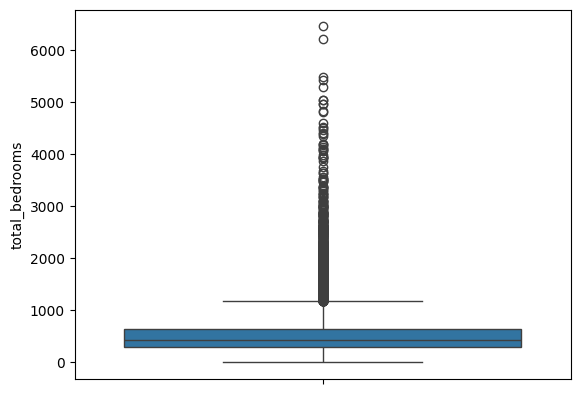

In [9]:
sns.boxplot(df['total_bedrooms'])

In [10]:
## As we can see there are lot of outlier's in the "total_bedrooms" column thus we the column has to be imputed with median values.
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
## Encoding the categorical columns
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [14]:
## Spliting the data into training and testing to avoid data-leakage
X =  df.drop('median_house_value',axis = 1)
y = df['median_house_value']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
categorical_col = 'ocean_proximity'
X_train_cat = X_train[[categorical_col]]
X_test_cat = X_test[[categorical_col]]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

encoded_cols = encoder.get_feature_names_out([categorical_col])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=[categorical_col]), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=[categorical_col]), X_test_encoded_df], axis=1)


In [18]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Harshit\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


## Model Creation

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [21]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "SVM" : SVR(),
    "KNN" : KNeighborsRegressor(),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor(),
    "Adaboost" : AdaBoostRegressor(),
    "GradientBoost" : GradientBoostingRegressor(),
    "xgboost" : XGBRegressor()
}
models

{'LinearRegression': LinearRegression(),
 'Lasso': Lasso(),
 'Ridge': Ridge(),
 'SVM': SVR(),
 'KNN': KNeighborsRegressor(),
 'DecisionTree': DecisionTreeRegressor(),
 'RandomForest': RandomForestRegressor(),
 'Adaboost': AdaBoostRegressor(),
 'GradientBoost': GradientBoostingRegressor(),
 'xgboost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    ## getting accuracy
    print(f"{list(models.keys())[i]} train_score = {r2_score(y_train, y_pred_train) * 100}")
    print(f"{list(models.keys())[i]} test_score = {r2_score(y_test, y_pred_test) * 100}")
    print("-"*30)
    print()
    #print(f"{list(models.keys())[i]} mean_sq_error = {mean_squared_error(y_test, y_pred)}")

LinearRegression train_score = 64.70480227253684
LinearRegression test_score = 63.936117114343936
------------------------------



C:\Users\Harshit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.143e+12, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(


Lasso train_score = 64.70480153807483
Lasso test_score = 63.93630869988962
------------------------------

Ridge train_score = 64.70479239893223
Ridge test_score = 63.93838404348905
------------------------------

SVM train_score = -5.027159744019283
SVM test_score = -5.044432134200583
------------------------------

KNN train_score = 81.68119256394888
KNN test_score = 71.08421697177187
------------------------------

DecisionTree train_score = 100.0
DecisionTree test_score = 62.597592193800125
------------------------------

RandomForest train_score = 97.43924874509405
RandomForest test_score = 81.84726301616665
------------------------------

Adaboost train_score = 36.43985670142226
Adaboost test_score = 35.4432752822783
------------------------------

GradientBoost train_score = 79.10786144960859
GradientBoost test_score = 76.71301107374919
------------------------------

xgboost train_score = 94.31935106691715
xgboost test_score = 83.37279385429191
------------------------------



## Xgboost and RandomForest preforms best among the all but they overfits. Both of these models preforms better on training dataset as compared to test. We have to hyperparameter tune these model to prevent overfitting.

In [24]:
rf_params = {
    "n_estimators" : [100, 200, 500, 1000],
    "max_features" : [5, 7, "auto", 8],
    "max_depth" : [5, 8, 15, 30, "auto"],
    "min_samples_split" : [2,8,15,20]
}

xgb_params = {
    "learning_rate" : [0.1, 0.01],
    "max_depth" : [5,8,12,20,30],
    "n_estimators" : [100, 200, 300],
    "colsample_bytree" : [0.5, 0.8, 1, 0.3, 0.4]
}

In [25]:
randomcv_models = [("XGBoost", XGBRegressor(), xgb_params)]

In [ ]:
from sklearn.model_selection import GridSearchCV
model_param = {}

for name, model, params in randomcv_models:
    random = GridSearchCV(estimator=model, param_grid=params, cv = 5, scoring="r2", n_jobs=-1)
    random.fit(X_train_scaled, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"Best params of{model_name}")
    print(model_param[model_name])

In [ ]:
models = {
    "RandomForest" : RandomForestRegressor(n_estimators = , max_features = ,max_depth = , min_samples_split = ),
    "xgboost" : XGBRegressor(learning_rate = , max_depth = , n_estimators = , colsample_bytree = )
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    ## getting accuracy
    print(f"{list(models.keys())[i]} train_score = {r2_score(y_train, y_pred_train) * 100}")
    print(f"{list(models.keys())[i]} test_score = {r2_score(y_test, y_pred_test) * 100}")
    print("-"*30)
    print()